In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matrixprofile as mp

In [4]:
datasetFriday = pd.read_csv('../verisetleri/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
datasetMonday = pd.read_csv('../verisetleri/Monday-WorkingHours.pcap_ISCX.csv')

In [5]:
import random
def randomize_packets(sampleNumber : int, dataset : pd.DataFrame)->pd.DataFrame : 
    randomizePackets = [random.randint(1, len(dataset)-1) for _ in range(sampleNumber)]
    randomizedData = list()
    for point in randomizePackets:
        randomizedData.append(dataset.iloc[point, : ])

    randomizedData = pd.DataFrame(randomizedData).reset_index()
    return randomizedData

In [6]:
def select_slice_from_dataframe(startingIndex : int , stopIndex : int, dataframe:pd.DataFrame)->pd.DataFrame:
    return dataframe.iloc[startingIndex : stopIndex, :]

In [8]:
randomizedData = randomize_packets(10000, datasetFriday)
slicedData = select_slice_from_dataframe(0, 25000, datasetFriday)

In [15]:
workerData = slicedData.copy()
numberOfPackets = len(workerData)
benignNumber = len(workerData[workerData[" Label"] == "BENIGN"])
ddosNumber = len(workerData[workerData[" Label"] == "DDoS"])


print(f"number of DDoS packets : {ddosNumber}")
print(f"number of Benign packets : {benignNumber}")
print(f"number of packets : {numberOfPackets}")

benignRatio = benignNumber / numberOfPackets
ddosRatio = ddosNumber / numberOfPackets

print(f"ddos Ratio : {ddosRatio} \nbenign Ratio: {benignRatio}")

number of DDoS packets : 4889
number of Benign packets : 20111
number of packets : 25000
ddos Ratio : 0.19556 
benign Ratio: 0.80444


In [16]:
workerData

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,80,2101188,4,0,24,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS
24996,80,299743,3,7,26,11607,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS
24997,80,2048624,4,0,24,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS
24998,80,305314,3,5,26,11607,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS


In [20]:
def concat_datasets(dataset1 : pd.DataFrame, dataset2 : pd.DataFrame, axis = 0):
    if (all(dataset1.columns == dataset2.columns)):
        return pd.concat([dataset1, dataset2], axis=axis)
    else:
        raise ValueError("Dataframe Columns must be identical")

In [21]:
mpDataset = concat_datasets(workerData, datasetMonday, 0)

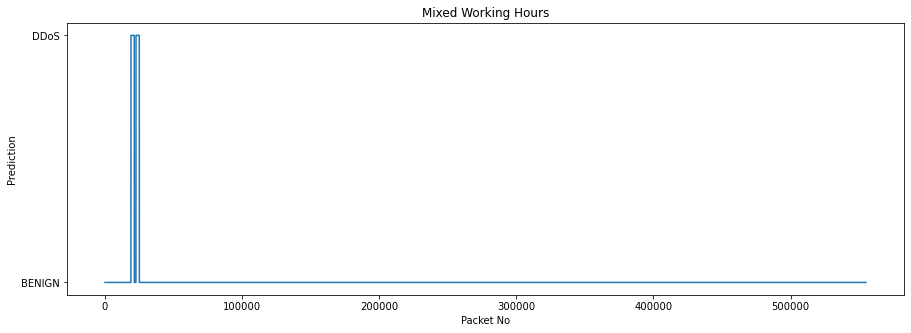

In [22]:
#plot ddosRatio
plt.figure(figsize=(15,5))
plt.plot(range(0, len(mpDataset)), mpDataset[" Label"].to_list())
plt.title('Mixed Working Hours')
plt.ylabel("Prediction")
plt.xlabel("Packet No")
plt.show()

In [24]:
someFeatureForTimeseries = mpDataset[" Avg Bwd Segment Size"]
window_size = 500

profile = mp.compute(someFeatureForTimeseries.to_list(), windows=window_size)
profile = mp.discover.discords(profile)

/Users/batuhanduyuler/opt/anaconda3/envs/batuenv/lib/python3.7/site-packages/matrixprofile/visualize.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


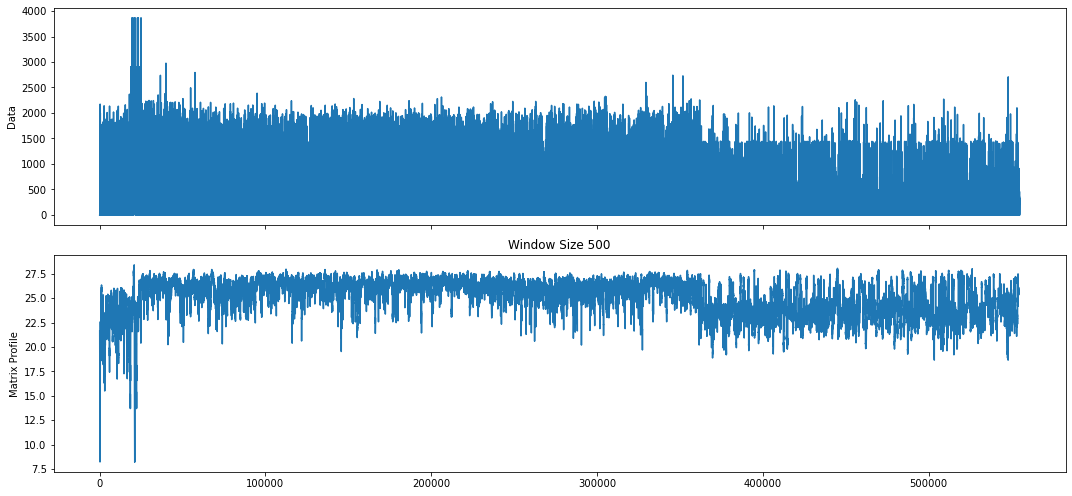

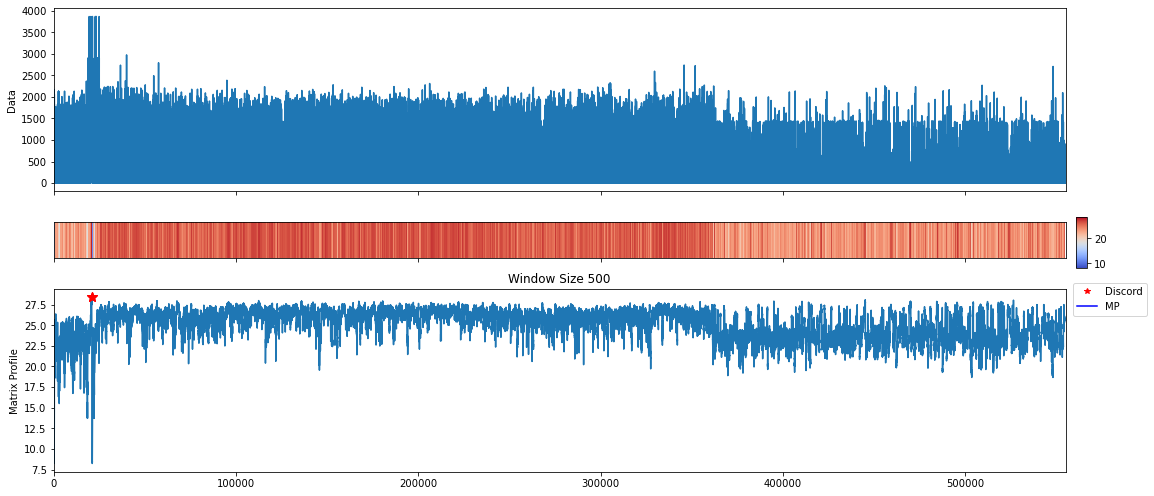

In [25]:
figures = mp.visualize(profile)